# Определение перспективного тарифа для телеком компании    

Анализ тарифов мобильного оператора.  
Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

### Описание тарифов  

##### Тариф «Смарт»  
1.	Ежемесячная плата: 550 рублей  
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3.	Стоимость услуг сверх тарифного пакета:  
•	минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)  
•	сообщение: 3 рубля  
•	1 Гб интернет-трафика: 200 рублей  

##### Тариф «Ультра»  
1.	Ежемесячная плата: 1950 рублей  
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3.	Стоимость услуг сверх тарифного пакета:  
•	минута разговора: 1 рубль  
•	сообщение: 1 рубль  
•	1 Гб интернет-трафика: 150 рублей  

## План исследования

### 1.Предобработка данных
    - Посмотрим общую информацию о данных
    - Сделаем предварительные выводы
    - Определим и заполним пропущенные значения
    - Поищем аномалии
    - Изменим типы данных
    - Удалим дубликаты и отфильтруем не нужные столбцы
### 2 .Посчитаем и добавим в таблицу:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;  
    - количество отправленных сообщений по месяцам;  
    - объем израсходованного интернет-трафика по месяцам;  
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).  

### 3. Проанализируем данные: 

    - Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### 4. Проверим гипотезы:  
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### 5. Общий вывод

### Шаг 1. Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
calls.to_csv('calls.csv', encoding='utf-8', index=False)
messages.to_csv('messages.csv', encoding='utf-8', index=False)
internet.to_csv('internet.csv', encoding='utf-8', index=False)
tariffs.to_csv('tariffs.csv', encoding='utf-8', index=False)

### Описание данных  

#### Таблица users (информация о пользователях):  
•	user_id — уникальный идентификатор пользователя  
•	first_name — имя пользователя  
•	last_name — фамилия пользователя  
•	age — возраст пользователя (годы)  
•	reg_date — дата подключения тарифа (день, месяц, год)  
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
•	city — город проживания пользователя  
•	tariff — название тарифного плана  

#### Таблица calls (информация о звонках):  
•	id — уникальный номер звонка  
•	call_date — дата звонка  
•	duration — длительность звонка в минутах  
•	user_id — идентификатор пользователя, сделавшего звонок  

#### Таблица messages (информация о сообщениях):  
•	id — уникальный номер сообщения  
•	message_date — дата сообщения  
•	user_id — идентификатор пользователя, отправившего сообщение  

#### Таблица internet (информация об интернет-сессиях):  
•	id — уникальный номер сессии  
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
•	session_date — дата интернет-сессии  
•	user_id — идентификатор пользователя  

#### Таблица tariffs (информация о тарифах):  
•	tariff_name — название тарифа  
•	rub_monthly_fee — ежемесячная абонентская плата в рублях  
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату  
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

#### Таблица users (информация о пользователях)

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [6]:
users.duplicated().sum()

0

38 пользователей перестали пользоваться услугами. Дубликатов нет.  
В таблице есть уникальный идентификатор пользователя, персональные данные нас в данном исследовании не интересуют. Отфильтруем ненужные столбцы.  

In [7]:
users_f = users.drop(['age','churn_date','first_name','last_name','reg_date'], axis=1)

In [8]:
# Посмотрим на количество пользователей каждого тарифа
users_f['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [9]:
users_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
user_id    500 non-null int64
city       500 non-null object
tariff     500 non-null object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


#### Таблица calls (информация о звонках): 

In [10]:
# Пропусков нет
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [12]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [13]:
calls.duplicated().sum()

0

Дубликатов нет. Пропуски отсутствуют. 
В описании проекта обращают внимание на проблему звонков с длительностью "0".  

In [14]:
# Посмотрим на звонки с "0"
calls.query('duration == 0')['user_id'].value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1016      6
1084      5
1406      5
1424      5
1442      5
Name: user_id, Length: 492, dtype: int64

In [15]:
calls.query('user_id == 1377')

,id,call_date,duration,user_id
149153,1377_0,2018-10-25,11.43,1377
149154,1377_1,2018-07-30,21.32,1377
149155,1377_2,2018-03-03,4.02,1377
149156,1377_3,2018-05-07,3.31,1377
149157,1377_4,2018-12-03,4.45,1377
...,...,...,...,...
150908,1377_1755,2018-09-18,24.63,1377
150909,1377_1756,2018-11-25,3.92,1377
150910,1377_1757,2018-05-14,7.07,1377
150911,1377_1758,2018-03-27,0.00,1377


In [16]:
calls.query('duration == 0 and user_id == 1377')

,id,call_date,duration,user_id
149162,1377_9,2018-04-10,0.00,1377
149166,1377_13,2018-12-26,0.00,1377
149171,1377_18,2018-04-15,0.00,1377
149181,1377_28,2018-06-02,0.00,1377
149186,1377_33,2018-03-13,0.00,1377
...,...,...,...,...
150862,1377_1709,2018-03-19,0.00,1377
150884,1377_1731,2018-06-30,0.00,1377
150886,1377_1733,2018-06-26,0.00,1377
150892,1377_1739,2018-11-12,0.00,1377


In [17]:
calls.query('duration == 0')['user_id'].count()

39613

Звонков длительностью "0" около 20% от общего количества.  
Почти у всех пользователей есть звонки с "0".

In [18]:
calls.query('1> duration > 0')['user_id'].count()

8314

Обратим внимание, что в промежутке от 0 до 1 минуты всего 5% звонков. Это странно, по логике таких звонков должно быть больше всего.  
Можно также предположить, что это "сброшенные" вызовы, либо клиент не дозвонился, но в таком случае они вообще не должны быть в таблице.  
Оптимально было бы уточнить причину у заказчика.  
С учётом информации о том, что («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута) будем считать, что это техническая ошибка при округлении звонков.

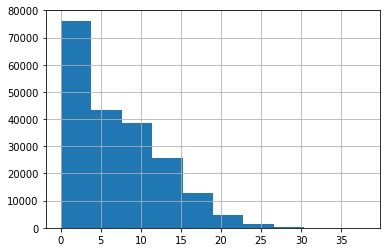

In [19]:
calls['duration'].hist()
plt.show()

In [20]:
# Округляем длительность в большую сторону до 1 минуты и перевеодим в целочисленный тип
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [21]:
# "0" звонки считаем длиной в 1 минуту
calls['duration'] = calls['duration'].replace(0, 1)

In [22]:
# Переводим в формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [23]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [24]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


#### Таблица messages (информация о сообщениях):  

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [26]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [27]:
messages.duplicated().sum()

0

In [28]:
# Переводим в формат даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


#### Таблица internet (информация об интернет-сессиях):

In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [31]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [32]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


In [33]:
internet.duplicated().sum()

0

По аналогии со звонками округляем в большую сторону и меняем 0 на 1.

In [34]:
# Округляем в большую сторону до 1 минуты и перевеодим в целочисленный тип
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [35]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [36]:
# Переводим в формат даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [37]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


#### Таблица tariffs (информация о тарифах): 

In [38]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [39]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Здесь всё корректно, но нужно заменить названия столбца tariff_name для дальнейшего джойна и mg_per_month_included для порядка.

In [40]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff', 'mg_per_month_included': 'mb_per_month_included'})

In [41]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод**
- Выполнена предобработка данных
- Данные обработаны в соответствии с условиями заказчика
- "0" в длительности звонков и мегабайтах заменены на "1" и сделано округление в большую сторону
- Отфильтрованы не нужные для исследования столбцы
- Приведены типы данных
- Аномальные значения в длительности звонков и интернет сессии не выявлены

### 2 .Посчитаем и добавим в таблицу:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам;

In [42]:
calls['month'] = calls['call_date'].dt.month

In [43]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [44]:
user_calls = calls.groupby(['user_id', 'month'],as_index = False)\
                  .agg({'duration':'sum', 'id':'count'})\
                  .rename(columns={'duration':'month_calls_duration','id':'month_calls_total'})\

In [45]:
user_calls.head()

,user_id,month,month_calls_duration,month_calls_total
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58


#### Количество отправленных сообщений по месяцам

In [46]:
messages['month'] = messages['message_date'].dt.month

In [47]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [48]:
user_messages = messages.groupby(['user_id', 'month'],as_index = False)\
                        .agg({'id':'count'})\
                        .rename(columns={'id':'month_sms_total'})

In [49]:
user_messages.head()

,user_id,month,month_sms_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объем израсходованного интернет-трафика по месяцам

In [50]:
internet['month'] = internet['session_date'].dt.month

In [51]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [52]:
user_internet = internet.groupby(['user_id', 'month'],as_index = False)\
                        .agg({'mb_used':'sum'})\
                        .rename(columns={'mb_used':'month_mb_total'})

In [53]:
user_internet.head()

,user_id,month,month_mb_total
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583


#### Месячная выручка с каждого пользователя

In [54]:
# Соберём данные в одну таблицу
costs = user_calls.merge(user_messages, on=['user_id','month'], how='outer')\
                  .merge(user_internet, on=['user_id','month'], how = 'outer')

In [55]:
costs.head()

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total
0,1000,5,164.00,22.00,22.00,"2,257.00"
1,1000,6,187.00,43.00,60.00,"23,262.00"
2,1000,7,346.00,47.00,75.00,"14,017.00"
3,1000,8,418.00,52.00,81.00,"14,072.00"
4,1000,9,478.00,58.00,57.00,"14,583.00"


Теперь добавим информацию по тарифу пользователя и информации о тарифе

In [56]:
costs = costs.merge(users_f, on='user_id', how='left').merge(tariffs, on='tariff', how='left')

In [57]:
costs

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.00,22.00,22.00,"2,257.00",Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.00,43.00,60.00,"23,262.00",Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.00,47.00,75.00,"14,017.00",Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.00,52.00,81.00,"14,072.00",Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.00,58.00,57.00,"14,583.00",Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.00,"17,246.00",Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,10,nan,nan,21.00,"19,599.00",Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,11,nan,nan,20.00,"17,526.00",Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,12,nan,nan,35.00,"17,349.00",Санкт-Петербург,smart,50,15360,500,550,200,3,3


Таблица готова, но появились nan. Это значит, что пользователь не пользовался интернетом/звонками/смс в этот месяц.  
Посмотрим на количество и заменим на 0.

In [58]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
month_calls_duration     3174 non-null float64
month_calls_total        3174 non-null float64
month_sms_total          2717 non-null float64
month_mb_total           3203 non-null float64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 401.8+ KB


In [59]:
# При соединении датафреймов Pandas привел типы к float64 из-за пропусков, заменим обратно на Int
features = ['month_calls_duration', 'month_calls_total', 'month_sms_total','month_mb_total']

for f in features:
    costs[f] = costs[f].fillna(0).astype('int')

In [60]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
month_calls_duration     3214 non-null int64
month_calls_total        3214 non-null int64
month_sms_total          3214 non-null int64
month_mb_total           3214 non-null int64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: int64(13), object(2)
memory usage: 401.8+ KB


In [61]:
costs.duplicated().sum()

0

In [62]:
# Вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
# остаток умножьте на значение из тарифного плана
def above_the_tariff(row):
    sms = (row['month_sms_total'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    # Цена за 1 гигабайт, поэтому даже 1 мб сверхлимита будет стоить как 1 гиг. Округляем вверх.
    mbs = np.ceil((row['month_mb_total'] - row['mb_per_month_included'])/ 1024)*row['rub_per_gb']
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [63]:
costs['total_over_tariff_rub'] = costs.apply(above_the_tariff, axis=1)

In [64]:
costs['total_paid_rub'] = costs['rub_monthly_fee'] + costs['total_over_tariff_rub']

In [65]:
costs.sort_values(by='total_paid_rub', ascending = False).head()

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_over_tariff_rub,total_paid_rub
3106,1486,12,1025,133,83,38627,Нижний Новгород,smart,50,15360,500,550,200,3,3,"6,274.00","6,824.00"
260,1042,12,755,121,75,37233,Хабаровск,smart,50,15360,500,550,200,3,3,"5,240.00","5,790.00"
1622,1261,12,1102,141,22,32717,Казань,smart,50,15360,500,550,200,3,3,"5,206.00","5,756.00"
3105,1486,11,788,108,96,36330,Нижний Новгород,smart,50,15360,500,550,200,3,3,"5,202.00","5,752.00"
1793,1286,12,751,95,68,35169,Москва,smart,50,15360,500,550,200,3,3,"4,807.00","5,357.00"


**Вывод**
Необходимые метрики рассчитаны. Переходим к анализу данных.

### 3. Проанализируем данные: 

**Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?**

In [66]:
# Выделим столбцы для анализа
values = ['month_calls_duration', 'month_sms_total', 'month_mb_total', 'total_over_tariff_rub', 'total_paid_rub']

In [67]:
# Сделаем сводную таблицу по тарифам в разрезе месяцев
tariff_monthly_costs = costs.pivot_table(
    index=['tariff', 'month'],
    values=values
)

In [68]:
# Посмотрим количество данных в выборке по каждому тарифу
costs['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Около 70% данных по пользователем тарифа смарт.  Является ли это соотношение верным для всех пользователей компании мы не знаем, но в целом более бюджетные тарифы обычно более популярны.

In [69]:
print('Количество пользователей Smart',len(costs.query('tariff =="smart"')['user_id'].unique()))
print('Количество пользователей Ultra',len(costs.query('tariff =="ultra"')['user_id'].unique()))

Количество пользователей Smart 350
Количество пользователей Ultra 148


Соотношение 70% также справедливо для количества пользователей.

In [70]:
# Данные по тарифу "Смарт"
smart_monthly_costs = tariff_monthly_costs.loc['smart']
smart_monthly_costs

,month_calls_duration,month_mb_total,month_sms_total,total_over_tariff_rub,total_paid_rub
month,,,,,
1,209.65,"8,528.59",18.24,173.35,723.35
2,306.31,"11,617.34",24.09,285.05,835.05
3,400.53,"15,131.21",31.86,628.57,"1,178.57"
4,377.00,"13,486.08",30.74,424.88,974.88
5,398.40,"15,832.75",33.77,669.11,"1,219.11"
6,406.70,"15,822.45",33.40,674.15,"1,224.15"
7,419.29,"15,771.40",33.75,696.47,"1,246.47"
8,433.19,"16,640.21",33.64,796.97,"1,346.97"
9,440.08,"16,332.62",33.64,724.50,"1,274.50"


In [71]:
# Данные по тарифу "Ультра"
ultra_monthly_costs = tariff_monthly_costs.loc['ultra']
ultra_monthly_costs

,month_calls_duration,month_mb_total,month_sms_total,total_over_tariff_rub,total_paid_rub
month,,,,,
1,440.89,"13,154.67",33.78,0.00,"1,950.00"
2,304.67,"11,788.33",21.96,25.00,"1,975.00"
3,503.08,"17,553.51",32.30,64.86,"2,014.86"
4,470.07,"16,845.25",31.56,51.82,"2,001.82"
5,524.87,"19,383.19",37.85,111.94,"2,061.94"
6,492.43,"18,943.93",41.73,91.07,"2,041.07"
7,560.30,"20,516.57",49.85,171.43,"2,121.43"
8,524.57,"19,595.88",48.44,133.18,"2,083.18"
9,553.64,"19,224.04",52.29,74.35,"2,024.35"


In [72]:
tariff_usage = tariff_monthly_costs.pivot_table(
    index='tariff',
    values=values
)
tariff_usage

,month_calls_duration,month_mb_total,month_sms_total,total_over_tariff_rub,total_paid_rub
tariff,,,,,
smart,397.37,"15,085.11",31.41,648.74,"1,198.74"
ultra,509.36,"18,224.48",43.71,97.74,"2,047.74"


- В среднем больше денег компании приносит тариф "Ультра"
- Пользователи "Смарт" часто превышают лимиты, но даже при этом средняя выручка для компании ниже.

In [73]:
print('Без превышения лимита',len(costs.query('tariff =="smart" and total_paid_rub ==550')))
print('C превышением лимита',len(costs.query('tariff =="smart" and total_paid_rub >550')))

Без превышения лимита 553
C превышением лимита 1676


In [74]:
# Почти все пользователи тарифа Смарт хотя бы раз превышали лимит
len(costs.query('tariff =="smart" and total_paid_rub >550')['user_id'].unique())

333

In [75]:
costs.pivot_table(
    index='tariff',
    values=['total_over_tariff_rub','total_paid_rub'], aggfunc = 'sum'
)

,total_over_tariff_rub,total_paid_rub
tariff,,
smart,"1,699,640.00","2,925,590.00"
ultra,"119,250.00","2,040,000.00"


- В 75% случаев(месяцев) пользователи тарифа "Смарт" превышают лимиты.  
- Почти 60% всего дохода по данному тарифу приносят услуги сверхтарифа.

Оператор может использовать эту информацию для маркетинговой компании.

- Пользователям "Ультра" хватает базовых лимитов.

### Средняя выручка Москва и другие регионы

In [76]:
# Разделим Москву и другие регионы
costs['region'] = np.where(costs['city'] == 'Москва', 'Москва', 'Другие регионы')

In [77]:
region_monthly_costs = costs.pivot_table(
    index=['region', 'month'],
    values=values
)

In [78]:
region_usage = region_monthly_costs.pivot_table(
    index='region',
    values=values
)
region_usage

,month_calls_duration,month_mb_total,month_sms_total,total_over_tariff_rub,total_paid_rub
region,,,,,
Другие регионы,424.59,"15,681.79",35.27,491.62,"1,438.16"
Москва,455.79,"17,603.18",33.94,427.71,"1,522.67"


- Средняя выручка Москвы почти не отличается от регионов.
- Отметим, что больше используется интернет. Это логично т.к в Москве лучше покрытие и скорость передачи данных.

#### Далее рассмотрим отдельно значения и построим гистрограммы. 
**Посчитаем среднее количество, дисперсию и стандартное отклонение**

In [79]:
smart_costs = costs.query("tariff == 'smart'")
ultra_costs = costs.query("tariff == 'ultra'")

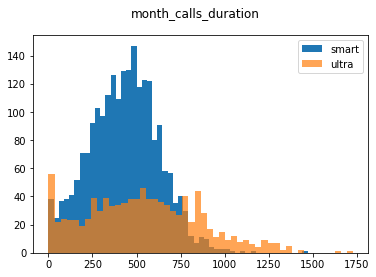

                       mean                  var                  std
       month_calls_duration month_calls_duration month_calls_duration
tariff                                                               
smart                429.45            37,974.77               194.87
ultra                540.78           106,105.73               325.74


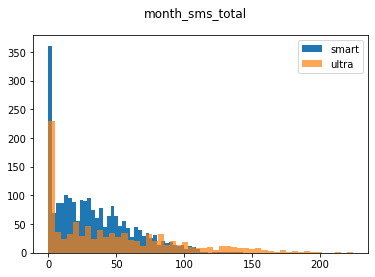

                  mean             var             std
       month_sms_total month_sms_total month_sms_total
tariff                                                
smart            33.38          796.81           28.23
ultra            49.36        2,285.27           47.80


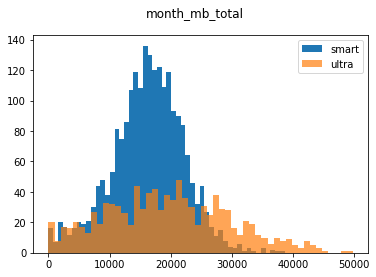

                 mean            var            std
       month_mb_total month_mb_total month_mb_total
tariff                                             
smart       16,237.18  34,571,991.09       5,879.80
ultra       19,488.70 101,951,580.69      10,097.11


In [80]:
for column in ['month_calls_duration', 'month_sms_total', 'month_mb_total']:  
    plt.hist(smart_costs[column],bins=50, label='smart')
    plt.hist(ultra_costs[column],bins=50, label='ultra', alpha=0.7)
    plt.legend(loc='upper right')
    plt.suptitle(column)
    plt.show()
    print(costs.pivot_table(index = 'tariff',values=column,aggfunc = ['mean','var','std']))

**Вывод**
- Пользователи "Смарт" в среднем почти полностью расходуют месячные лимиты по минутам и сообщениям. По интернету перерасход, как уже было отмечено ранее в 75% случаев.
- На тарифе "Ультра" большой разброс значений, но при этом за месяные лимиты пользователи почти не выходят.
- СМС большинство пользователей не используют.

### 4. Проверим гипотезы: 

**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается**  
- Средняя выручка пользователя тарифа "Смарт": 1198.74 руб  
- Средняя выручка пользователя тарифа "Ультра": 2047.74 руб

Сформулируем гипотезы:  

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается  
H1: выручка пользователей тарифов «Ультра» и «Смарт» различается  

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [81]:
alpha = .05

results = st.ttest_ind(
    smart_costs['total_paid_rub'], 
    ultra_costs['total_paid_rub'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.857477410979864e-149
Отвергаем нулевую гипотезу


In [86]:
np.var(smart_costs['total_paid_rub'],ddof = 1)

690458.1619886545

In [85]:
np.var(ultra_costs['total_paid_rub'],ddof = 1)

143491.24055961374

Средняя выручка по тарифам не одинакова. Вероятность случайно получить такое отличие крайне мала.  
Следовательно, средняя выручка пользователей тарифов "Смарт" и "Ультра" действительно различается и наша гипотеза подтвердилась.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**
- Средняя выручка пользователей из Москвы: 1522.67 руб
- Средняя выручка пользователей из других регионов: 1438.16 руб

Сформулируем гипотезы:

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов  
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [82]:
alpha = .05

moscow = costs.query("region == 'Москва'")['total_paid_rub']
other_city = costs.query("region == 'Другие регионы'")['total_paid_rub']

results = st.ttest_ind(moscow, other_city)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.578869733775166
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов незначительно отличается, с вероятностью в почти 58% такое различие можно получить случайно. 
Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, и наша гипотеза не подтвердилась.

### 5. Общий вывод

- По результатам исследования можно сделать вывод о том, что средняя выручка от пользователя тарифа "Ультра" на 40% выше тарифа "Смарт". 
- В тоже время, если соотношение общего количества клиентов компании соответствует данным в выборке и пользователей тарифа "Смарт" 70% от общего количества - суммарная прибыль от тарифа "Смарт" больше примерно на 30%.
- Основную часть прибыли по тарифу "Смарт" от дополнительных расходов.  
- 95% пользователей тарифа "Смарт" хотя бы раз превышали установленные лимиты по тарифу.  
  77% превышений бесплатного лимита.
  15гб интернета не хватает большинству пользователей.  
- Пользователи тарифа "Ультра" в большинстве случаев не расходуют даже половину установленных лимитов.
- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Стоит активно рекламировать тариф "Ультра". Основной целевой группой выбрать пользователей тарифа "Смарт", которые часто превышают лимиты.  
Однако нужно следить за оттоком пользователей. Частые превышения лимитов и переплаты пользователей "Смарт" и большой остаток не использованных ресурсов "Ультра" может привести к потере клиентов.  

Нужно рассмотреть возможность ввести средний вариант тарифа "Оптима" с ежемесячной платой 1200 рублей, минуты 750, интернет 20гб.  
Также возможен вариант тарифа для активных интернет пользователей с повышенным лимитом по интернету.  

**Техническая рекомендация**
- Решить вопрос с наличием "нулевых" звонков и мегабайтов.